# Decission Tree Regression Workflow

This file demonstrates the workflow used for optimizing, training, and evaluating the decission tree regression models developed for predicting the soft phonon frequency of KTaO3 based on irreducible representation order parameters, strain tensor components, and structural metrics.

### Import the datasets

In [84]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/irrep_order_parameter_magnitudes_and_phonon_frequency_dataset.csv')
df1 = pd.read_csv('data/strain_tensor_component_and_phonon_frequency_dataset.csv')
df2 = pd.read_csv('data/octahedron_structure_metrics_and_phonon_frequency_dataset.csv')

### Datasets to be trained on:

Irreducible representation order parameter magnitudes:

In [123]:
df

,gm1,gm3_a0,gm3_0a,gm5_a00,gm5_0a0,gm5_00a,frequency
0,-0.005,0.00,-0.0024,0.00,-0.01,0.00,7909.790147
1,-0.005,0.00,-0.0024,0.00,-0.01,0.01,7619.874234
2,-0.005,0.00,-0.0024,0.00,-0.01,-0.01,7619.800560
3,-0.005,0.00,-0.0024,0.00,0.00,-0.01,7620.930328
4,-0.005,0.00,-0.0024,0.00,0.00,0.00,7888.340652
...,...,...,...,...,...,...,...
724,0.005,-0.01,-0.0024,-0.01,0.01,0.01,-7144.198048
725,0.005,-0.01,-0.0024,-0.01,0.01,-0.01,-7166.562992
726,0.005,-0.01,-0.0024,-0.01,-0.01,0.00,-7022.370614
727,0.005,-0.01,-0.0024,-0.01,-0.01,0.01,-7166.570611


Strain tensor components:

In [124]:
df1

,exx,eyy,ezz,exy,exz,eyz,frequency
0,0.01,0.00,-0.01,-0.01,-0.01,0.01,-11388.702497
1,0.01,0.00,-0.01,-0.01,-0.01,0.00,-11396.867022
2,0.01,0.00,-0.01,-0.01,-0.01,-0.01,-11384.635415
3,0.01,0.00,-0.01,-0.01,0.01,-0.01,-11388.595566
4,0.01,0.00,-0.01,-0.01,0.01,0.00,-11396.777134
...,...,...,...,...,...,...,...
724,-0.01,-0.01,0.00,0.01,0.01,-0.01,2481.243214
725,-0.01,-0.01,0.00,0.01,0.01,0.00,2593.318450
726,-0.01,-0.01,0.00,0.01,-0.01,-0.01,2467.418950
727,-0.01,-0.01,0.00,0.01,-0.01,0.00,2593.290136


Octahedron structure metrics:

In [125]:
df2


,average bond length,distortion index,bond angle variance,frequency
0,1.988859,0.001129,0.240535,7909.790147
1,1.988893,0.001140,0.480232,7619.874234
2,1.988893,0.001140,0.480232,7619.800560
3,1.988859,0.001146,0.239718,7620.930328
4,1.988826,0.001135,0.000000,7888.340652
...,...,...,...,...
724,2.000441,0.005427,0.707081,-7144.198048
725,2.000441,0.005427,0.717123,-7166.562992
726,2.000408,0.005433,0.474186,-7022.370614
727,2.000441,0.005427,0.717123,-7166.570611


### Prepare data for training and testing

Convert each of the above dataframes to their respective target matrices and feature vectors.

In [88]:
order_param_features = df[['gm1','gm3_a0','gm3_0a','gm5_a00','gm5_0a0','gm5_00a']]
order_param_target = df['frequency']

strain_component_features = df1[['exx','eyy','ezz','exy','exz','eyz']]
strain_component_target = df1['frequency']

structure_metric_features = df2[['average bond length','distortion index','bond angle variance']]
structure_metric_target = df2['frequency']


Scale each of the datasets into training and testing sets. We chose to use a 75/25 split as shown below.

In [89]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

#Split data into test and train sets
irrep_features_train, irrep_features_test, irrep_target_train, irrep_target_test = train_test_split(order_param_features, 
                                                                                                    order_param_target, 
                                                                                                    test_size=0.25, random_state=11)
strain_features_train, strain_features_test, strain_target_train, strain_target_test = train_test_split(strain_component_features, 
                                                                                                    strain_component_target, 
                                                                                                    test_size=0.25, random_state=4)
struc_features_train, struc_features_test, struc_target_train, struc_target_test = train_test_split(structure_metric_features, 
                                                                                                    structure_metric_target, 
                                                                                                    test_size=0.25, random_state=6)

Scale the training feature datasets. We chose to use the StandardScalar package provided by Scikit Learn since the feature distributions in each dataset are normal.

In [90]:
from sklearn import preprocessing

irrep_scaler = preprocessing.StandardScaler().fit(irrep_features_train)  
irrep_features_train_scaled = irrep_scaler.transform(irrep_features_train)
irrep_features_test_scaled = irrep_scaler.transform(irrep_features_test)

strain_scaler = preprocessing.StandardScaler().fit(strain_features_train)  
strain_features_train_scaled = strain_scaler.transform(strain_features_train)
strain_features_test_scaled = strain_scaler.transform(strain_features_test)

struc_scaler = preprocessing.StandardScaler().fit(struc_features_train)  
struc_features_train_scaled = struc_scaler.transform(struc_features_train)
struc_features_test_scaled = struc_scaler.transform(struc_features_test)

### Use cross-validation to perform a grid-search for the most optimal hyperparameters

In [91]:
#Declare functions for performing cross validation and calculating error
def get_rmse(actual, pred):
    return np.mean([(actual[i]-pred[i])**2 for i in range(len(actual))])**0.5

def run_cv(n_folds, model, X_train, y_train, stratify=False):
    """
    Args:
        n_folds (int) : how many folds of CV to do
        model (sklearn Model) : what model do we want to fit
        X_train (np.array) : feature matrix
        y_train (np.array) : target array
        stratify (bool) : if True, use stratified CV, otherwise, use random CV
        
    Returns:
        a dictionary with scores from each fold for training and validation
            {'train' : [list of training scores],
             'val' : [list of validation scores]}
            - the length of each list = n_folds
    """
    if stratify:
        folds = StratifiedKFold(n_splits=n_folds).split(X_train, y_train)
    else:
        folds = KFold(n_splits=n_folds).split(X_train, y_train)

    train_scores, val_scores = [], []
    for k, (train, val) in enumerate(folds):

        X_train_cv = X_train[train]
        y_train_cv = y_train[train]

        X_val_cv = X_train[val]
        y_val_cv = y_train[val]

        model.fit(X_train_cv, y_train_cv)

        y_train_cv_pred = model.predict(X_train_cv)
        y_val_cv_pred = model.predict(X_val_cv)

        train_acc = get_rmse(y_train_cv, y_train_cv_pred)
        val_acc = get_rmse(y_val_cv, y_val_cv_pred)

        train_scores.append(train_acc)
        val_scores.append(val_acc)

    print('%i Folds' % n_folds)
    print('Mean training error = %.3f +/- %.4f' % (np.mean(train_scores), np.std(train_scores)))
    print('Mean validation error = %.3f +/- %.4f' % (np.mean(val_scores), np.std(val_scores)))
    
    training_rmse.append(np.mean(train_scores))
    training_std.append(np.std(train_scores))
    validation_rmse.append(np.mean(val_scores))
    validation_std.append(np.std(val_scores))
    

    return {'train' : train_scores,
           'val' : val_scores}

We chose to perform a 10-fold cross-validation. The hyperparameters we consider for devloping decission tree regression models are the max depth, minimum samples per leaf, and the mininum weight fraction per leaf. Please refer to the documentation provided by Scikit Learn for greater detail.

In [101]:
from sklearn.tree import DecisionTreeRegressor

max_depth = np.arange(1,16)
min_samples_leaf = np.arange(1,11,1)
min_weight_fraction_leaf = np.arange(0,0.6,0.1)
n_folds = 10

#Iterate through all hyperparamter values of interest to perform grid search

def grid_search(X_train_scaled, y_train):
    grid_search_df = pd.DataFrame()
    md = []
    msl = []
    mwfl = []
    tr_rmse = []
    avg_tr_rmse = []
    val_rmse = []
    avg_val_rmse = []
    for j in max_depth:
        for k in min_samples_leaf:
            for l in min_weight_fraction_leaf:
                training_rmse, training_std = [], []
                validation_rmse, validation_std = [], []
                model = DecisionTreeRegressor(max_depth=j, min_samples_leaf=k, min_weight_fraction_leaf=l, random_state=14)                           
                cv_scores = run_cv(n_folds=n_folds,
                                    model=model,
                                    X_train=X_train_scaled,
                                    y_train=y_train)
                md.append(j)
                msl.append(k)
                mwfl.append(l)
                tr_rmse.append(cv_scores['train'])
                avg_tr_rmse.append(np.mean(cv_scores['train']))
                val_rmse.append(cv_scores['val'])
                avg_val_rmse.append(np.mean(cv_scores['val']))
                
    grid_search_df['max depth'] = md
    grid_search_df['min samples per leaf'] = msl
    grid_search_df['min weight fraction per leaf'] = mwfl
    grid_search_df['train rmse'] = tr_rmse
    grid_search_df['validation rmse'] = val_rmse
    grid_search_df['average train rmse'] = avg_tr_rmse
    grid_search_df['average validation rmse'] = avg_val_rmse

    return grid_search_df


Format target data for training so that its compatible with the cross-validation function

In [102]:
irrep_target_train = np.array(irrep_target_train).reshape(-1, 1)
strain_target_train = np.array(strain_target_train).reshape(-1,1)
struc_target_train = np.array(struc_target_train).reshape(-1,1)

Perform the grid search for each dataset

In [113]:
irrep_grid_search_results = grid_search(irrep_features_train_scaled, irrep_target_train)
strain_grid_search_results = grid_search(strain_features_train_scaled, strain_target_train)
struc_grid_search_results = grid_search(struc_features_train_scaled, struc_target_train)

10 Folds
Mean training error = 4432.362 +/- 41.8614
Mean validation error = 4427.442 +/- 374.4759
10 Folds
Mean training error = 4432.362 +/- 41.8614
Mean validation error = 4427.442 +/- 374.4759
10 Folds
Mean training error = 4432.362 +/- 41.8614
Mean validation error = 4427.442 +/- 374.4759
10 Folds
Mean training error = 4432.362 +/- 41.8614
Mean validation error = 4427.442 +/- 374.4759
10 Folds
Mean training error = 6113.983 +/- 43.4975
Mean validation error = 6111.607 +/- 394.4982
10 Folds
Mean training error = 6113.983 +/- 43.4975
Mean validation error = 6111.607 +/- 394.4982
10 Folds
Mean training error = 4432.362 +/- 41.8614
Mean validation error = 4427.442 +/- 374.4759
10 Folds
Mean training error = 4432.362 +/- 41.8614
Mean validation error = 4427.442 +/- 374.4759
10 Folds
Mean training error = 4432.362 +/- 41.8614
Mean validation error = 4427.442 +/- 374.4759
10 Folds
Mean training error = 4432.362 +/- 41.8614
Mean validation error = 4427.442 +/- 374.4759
10 Folds
Mean traini

### Analyze grid-search results

In [126]:
irrep_grid_search_results_data = irrep_grid_search_results.copy()
strain_grid_search_results_data = strain_grid_search_results.copy()
struc_grid_search_results_data = struc_grid_search_results.copy()

Irreducible representation order parameter magnitudes model

In [165]:
irrep_grid_search_matrix = irrep_grid_search_results_data[['max depth','min samples per leaf','min weight fraction per leaf','average validation rmse']].to_numpy()
max_depth_min_samples_array = []
max_depth_min_weight_array = []

for i, value in enumerate(irrep_grid_search_matrix[:,2]):
    if value == 0:
        max_depth_min_samples_array.append(irrep_grid_search_matrix[i,:].tolist()) 
for i, value in enumerate(irrep_grid_search_matrix[:,1]):
    if value == 1:
        max_depth_min_weight_array.append(irrep_grid_search_matrix[i,:].tolist())  

max_depth_min_samples_array_reshaped = np.array(max_depth_min_samples_array)
max_depth_min_weight_array_reshaped = np.array(max_depth_min_weight_array)

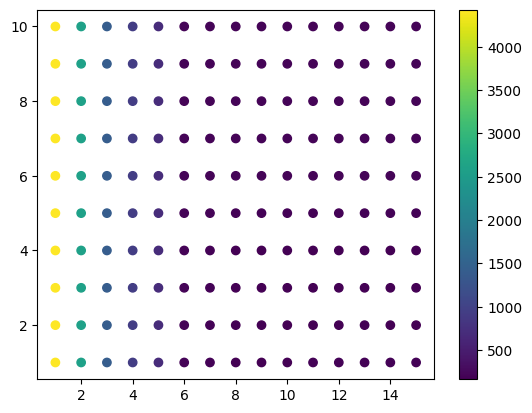

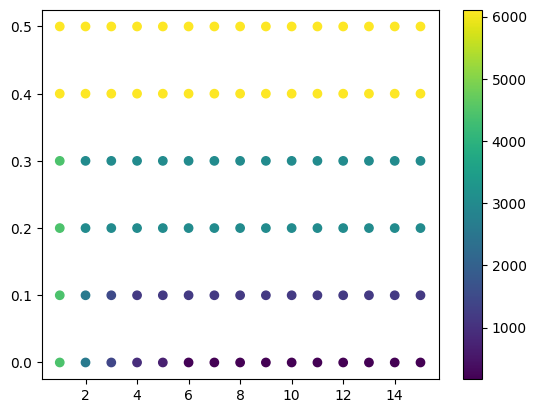

In [167]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.scatter(max_depth_min_samples_array_reshaped[:,0], max_depth_min_samples_array_reshaped[:,1], c=max_depth_min_samples_array_reshaped[:,3], cmap='viridis')
plt.colorbar()
plt.show()
plt.scatter(max_depth_min_weight_array_reshaped[:,0], max_depth_min_weight_array_reshaped[:,2], c=max_depth_min_weight_array_reshaped[:,3], cmap='viridis')
plt.colorbar()
plt.show()